In [1]:
import sys

assert sys.version_info >= (3, 7)

In [2]:
from packaging import version
import tensorflow as tf

assert version.parse(tf.__version__) >= version.parse("2.8.0")

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Odpowiedz na ponizsze pytania (1 pkt za każde pytanie)

1. Jaki problem ma rozwiązać inicjalizacja Glorot i inicjalizacja He?

Dzieki inicjalizacji Glotot i He nie wystepuje problem zanikajacych gradientow.

2. Czy można zainicjować wszystkie wagi na tę samą wartość, o ile ta wartość jest wybierana losowo przy użyciu inicjalizacji He?

Nie jest to mozliwe, wagi tego beda rozne.

3. Czy można zainicjować wyraz wolny (bias) na 0?

Jest to mozliwe, za pomoca bias_initializer='zeros'.

4. W jakich przypadkach należy uzywać funkcji aktywacyjnych omówionych w na tych zajęciach?

Przedstawione na zajeciach funkcje aktywacyjne nalezy uzywac kiedy mamy do czynienia z bardziej skomplikwanymi modelami.

5. Co może się stać, jeśli podczas korzystania z optymalizatora SGD ustawisz hiperparametr `momentum` na zbyt blisko 1 (np. 0,99999)?

Moze wystopic problem polegajacy na wystapieniu zbyt duzego pedu spadku co spowoduje, ominiecie minimum.

6. Wymień trzy sposoby tworzenia rzadkiego modelu.

* Zastosowanie warstwy dropout 
* Zastosowanie regualryzacji ℓ1
* Stworzenie niepelnego modelu

7. Czy metoda porzucenia (`Dropout`) spowalnia trening? Czy spowalnia wnioskowanie (tj. przewidywanie nowych przypadków)?

* Metoda nieznacznie spowalnia trening. Lecz wszystko zalezy od wartosci porzucenia przy duzych wartosc porzucenia 
trening moze sie spowolnic i trening moze stracic na stabilnosci

* Jesli chodzi o wnioskowanie to dropout nie wplywa w zaden spobob na ten proces.

## Uczenie głębokie na zestawie cifar10

In [4]:
import tensorflow as tf
from pathlib import Path
import matplotlib.pyplot as plt
tf.random.set_seed(42)

Zbiór danych składa się z 60 000 kolorowych obrazów o wymiarach 32 × 32 pikseli (50 000 do trenowania, 10 000 do testowania) z 10 klasami, więc będziesz potrzebować warstwy wyjściowej softmax z 10 neuronami. 

In [5]:
(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train_full[5000:]
y_train = y_train_full[5000:]
x_valid = x_train_full[:5000]
y_valid = y_train_full[:5000]

In [6]:
print(x_train.shape)
print(y_train.shape)

print(x_valid.shape)
print(y_valid.shape)

(45000, 32, 32, 3)
(45000, 1)
(5000, 32, 32, 3)
(5000, 1)


*__Ćwiczenie__: Stwórz sieć głęboką zawierającą 20 warstw ukrytych po 100 neuronów w każdej (jest ich za dużo, ale taki jest morał tego ćwiczenia). Skorzystaj z inicjalizacji He i funkcji aktywacji Swish. Pamiętaj jak powinna wyglądać ostatnia wartswa.*

In [7]:

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for i in range(20):
    model.add(tf.keras.layers.Dense(100, kernel_initializer="he_normal", activation="swish"))
#uzupełnij kod poniżej (1pkt)

model.add(tf.keras.layers.Dense(10, activation="softmax"))

*__Ćwiczenie__: Wprowadź optymalizację Nadam i wczesne zatrzymywanie, współczynnik uczenia `lr=5e-5`, po czym wyucz sieć na 100 epokach. Dokonaj ewaluacji na zbiorze walidacyjnyc. __W tym ćwiczeniu skorzystaj z `validation_data`, a nie `validation_split`)__*

In [8]:
#wpisz kod poniżej (1pkt)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20,restore_best_weights=True)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.legacy.Nadam(learning_rate=5e-5),
              metrics=["accuracy"])

history = model.fit(x_train,y_train, epochs=100,
                    validation_data=(x_valid,y_valid), callbacks=early_stopping_cb)

Epoch 1/100
1407/1407 [==============================] - 8s 5ms/step - loss: 5.6556 - accuracy: 0.1645 - val_loss: 2.1180 - val_accuracy: 0.2230
Epoch 2/100
1407/1407 [==============================] - 7s 5ms/step - loss: 2.0449 - accuracy: 0.2444 - val_loss: 2.0189 - val_accuracy: 0.2456
Epoch 3/100
1407/1407 [==============================] - 7s 5ms/step - loss: 1.9461 - accuracy: 0.2836 - val_loss: 1.9108 - val_accuracy: 0.2962
Epoch 4/100
1407/1407 [==============================] - 7s 5ms/step - loss: 1.8720 - accuracy: 0.3142 - val_loss: 1.9739 - val_accuracy: 0.3066
Epoch 5/100
1407/1407 [==============================] - 7s 5ms/step - loss: 1.8169 - accuracy: 0.3372 - val_loss: 1.8544 - val_accuracy: 0.3184
Epoch 6/100
1407/1407 [==============================] - 7s 5ms/step - loss: 1.7713 - accuracy: 0.3582 - val_loss: 1.7570 - val_accuracy: 0.3646
Epoch 7/100
1407/1407 [==============================] - 7s 5ms/step - loss: 1.7327 - accuracy: 0.3752 - val_loss: 1.7391 - val_ac

*__Ćwiczenie__:Narysuj krzywe uczenia*

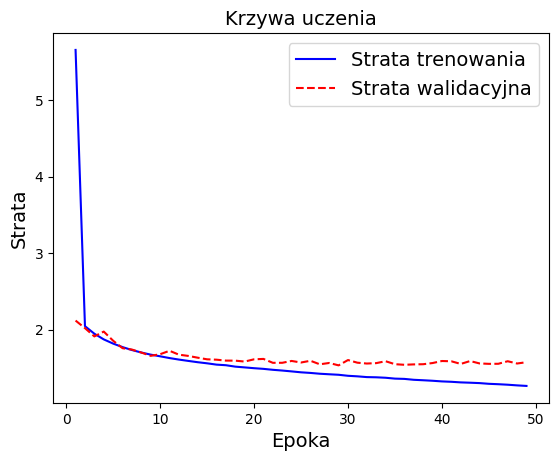

In [9]:
#wpisz kod poniżej (1pkt)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs,loss, 'b-', label="Strata trenowania")

plt.plot(epochs, val_loss, 'r--', label="Strata walidacyjna")
plt.title("Krzywa uczenia")
plt.xlabel("Epoka")
plt.ylabel("Strata")
plt.legend()

plt.show()

*__Cwiczenie__: Uzupełnij tekst (1pkt):* 

Model o najmniejszej stracie walidacyjnej uzyskuje ok. 46,3% dokładności na zbiorze walidacyjnym. Do osiągnięcia tej straty wymaganych było 29 epok, z których każda trwała ok. 10 sekund na moim laptopie (bez karty graficznej). Sprawdźmy, czy usprawnimy ten model za pomocą normalizacji wsadowej.

*__Ćwiczenie__: Spróbuj teraz dodać normalizację wsadową i porównać współczynniki uczenia. Czy model uzyskuje teraz szybciej zbieżność? Czy otrzymany model jest lepszy? Co się dzieje z szybkością uczenia?*

Kod bardzo przypomina powyższy listing, za wyjątkiem kilku zmian:

* dodaj warstwę BN do każdej warstwy gęstej (przed funkcją aktywacji), za wyjątkiem warstwy wyjściowej.
* Zmień wartość współczynnika uczenia na 5e-4.

In [10]:
#wpisz kod poniżej: (1pkt)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for i in range(20):
    model.add(tf.keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation("swish"))

model.add(tf.keras.layers.Dense(10, activation="softmax"))


In [11]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.legacy.Nadam(learning_rate=5e-4),
              metrics=["accuracy"])

history = model.fit(x_train,y_train, epochs=100,
                    validation_data=(x_valid,y_valid), callbacks=early_stopping_cb)

Epoch 1/100
1407/1407 [==============================] - 15s 8ms/step - loss: 2.0515 - accuracy: 0.2467 - val_loss: 2.3046 - val_accuracy: 0.2566
Epoch 2/100
1407/1407 [==============================] - 12s 8ms/step - loss: 1.7915 - accuracy: 0.3503 - val_loss: 1.9373 - val_accuracy: 0.2996
Epoch 3/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.6864 - accuracy: 0.3962 - val_loss: 1.8485 - val_accuracy: 0.3272
Epoch 4/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.6159 - accuracy: 0.4217 - val_loss: 1.8441 - val_accuracy: 0.3422
Epoch 5/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.5573 - accuracy: 0.4455 - val_loss: 1.6362 - val_accuracy: 0.4336
Epoch 6/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.5062 - accuracy: 0.4618 - val_loss: 1.6178 - val_accuracy: 0.4156
Epoch 7/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.4626 - accuracy: 0.4774 - val_loss: 1.6126 -

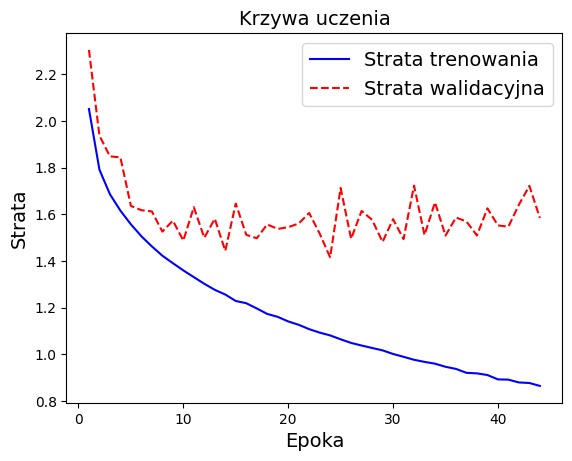

In [12]:
#wpisz kod poniżej (1pkt)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs,loss, 'b-', label="Strata trenowania")

plt.plot(epochs, val_loss, 'r--', label="Strata walidacyjna")
plt.title("Krzywa uczenia")
plt.xlabel("Epoka")
plt.ylabel("Strata")
plt.legend()

plt.show()

*__Ćwiczenie__: Odpowiedz na pytania (po 1 punkt na pdpowiedź):*

* *Czy model uzyskuje teraz szybciej zbieżność?* 

Model uzyskuje zbieznosc do wiekszej liczbie epok

* *Czy otrzymany model jest lepszy?* 

Otrzymany model uzyskuje lepsza dokladnosc oraz nizsza strate. Co oznacza ze model jest lepszy chociaz roznica nie jest ogromna.

* *Co się dzieje z szybkością uczenia?* 

Kazda epoka trwa kilka sekund dluzej.

*__Ćwiczenie__: Zastąp teraz normalizację wsadową funkcją SELU i wprowadź wszelkie modyfikacje wymagane to spełnienia wymogu samonormalizacji sieci (tj. standaryzuj cechy wejściowe, skorzystaj z klasycznej inicjalizacji LeCuna.*

In [13]:
#wpisz kod poniżej: (1pkt)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for i in range(20):
    model.add(tf.keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))
    

model.add(tf.keras.layers.Dense(10, activation="softmax"))


In [14]:
mean = x_train.mean(axis=0,keepdims=True)
std = x_train.std(axis=0,keepdims=True)

x_train_scaled = (x_train - mean) / std
x_valid_scaled = (x_valid - mean) / std

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.legacy.Nadam(learning_rate=5e-4),
              metrics=["accuracy"])

history = model.fit(x_train_scaled,y_train, epochs=100,
                    validation_data=(x_valid_scaled,y_valid), callbacks=early_stopping_cb)

Epoch 1/100
1407/1407 [==============================] - 10s 6ms/step - loss: 1.8948 - accuracy: 0.3221 - val_loss: 1.7322 - val_accuracy: 0.3882
Epoch 2/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.6816 - accuracy: 0.4056 - val_loss: 1.7781 - val_accuracy: 0.3800
Epoch 3/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.5799 - accuracy: 0.4444 - val_loss: 1.6104 - val_accuracy: 0.4298
Epoch 4/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.5119 - accuracy: 0.4656 - val_loss: 1.5959 - val_accuracy: 0.4418
Epoch 5/100
1407/1407 [==============================] - 9s 6ms/step - loss: 1.4502 - accuracy: 0.4930 - val_loss: 1.5566 - val_accuracy: 0.4532
Epoch 6/100
1407/1407 [==============================] - 9s 6ms/step - loss: 1.3994 - accuracy: 0.5118 - val_loss: 1.5166 - val_accuracy: 0.4634
Epoch 7/100
1407/1407 [==============================] - 9s 6ms/step - loss: 1.3566 - accuracy: 0.5280 - val_loss: 1.5040 - val_a

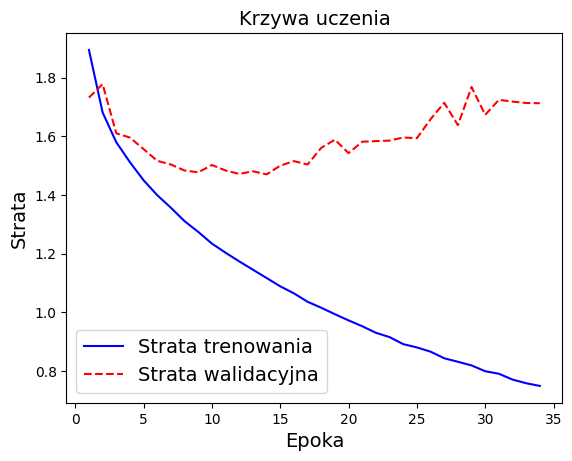

In [15]:
#wpisz kod poniżej (1pkt)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs,loss, 'b-', label="Strata trenowania")

plt.plot(epochs, val_loss, 'r--', label="Strata walidacyjna")
plt.title("Krzywa uczenia")
plt.xlabel("Epoka")
plt.ylabel("Strata")
plt.legend()

plt.show()

*__Ćwiczenie__: Uzupełnij tekst (1pkt)*:

Model ten uzyskał stratę walidacyjną na poziomie pierwszego modelu w zaledwie 6 epok. Po 9 epokach uzyskał najmniejszą stratę walidacyjną, przekładającą się na mniej więcej 49,8% dokładności, co jest wynikiem lepszym od pierwotnego modelu (46,7%), ale nieco gorszym od modelu wykorzystującego normalizację wsadową (50,7%). Każda epoka trwała zaledwie 8 sekund. Jest to więc jak do tej pory najszybciej wytrenowany model.